# Trabajo Práctico Especial

Señales y Sistemas (TB065) - Curso 1 - FIUBA - 2C2024  
Martin Klöckner - mklockner@fi.uba.ar  
Nicolás Chechko - vchechko@fi.uba.ar  
Matteo Aguilar Cafferata - meaguilar@fi.uba.ar  

## Primera Parte: Dominio de Tiempo

En esta primera parte del trabajo práctico se pide graficar dos señales de
audio en formato WAV en el dominio de tiempo; luego, para una de ellas
identificar diferentes notas musicales y calcular sus frecuencias fundamentales; finalmente,
para la señal de audio restante, identificar las diferencias entre instrumentos de
percusión e instrumentos armónicos.

Para la realización de los gráficos se utiliza el lenguaje de programación
[python](https://www.python.org) junto con las librerías
[scipy](https://docs.scipy.org/doc/scipy/index.html),
[matplotlib](https://matplotlib.org/) y
[numpy](https://numpy.org/doc/stable/index.html).

### Obtención y Muestra de Archivos

Empezamos importando las librerías mencionadas previamente en un nuevo script
de python. Además, se importa el método [urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) del módulo [urllib.request](https://docs.python.org/3/library/urllib.request.html#module-urllib.request) para obtener localmente los archivos a analizar.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import wavfile
from urllib.request import urlretrieve

Para obtener los archivos a analizar, se define una variable para almacenar el nombre de los archivos y se descargan utilizando el método [urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) proporcionando las respectivas urls y el nombre final que se desea que tengan los archivos una vez descargados.

In [2]:
file1_name = 'InASentimentalMood.wav'
file2_name = 'Zombie.wav'

urlretrieve('https://github.com/mjkloeckner/TB065/raw/main/primera_parte/InASentimentalMood.wav', file1_name);
urlretrieve('https://github.com/mjkloeckner/TB065/raw/main/primera_parte/Zombie.wav', file2_name);

Continuamos leyendo el contenido del primer archivo de nombre `InASentimentalMood.wav`,
para lo cual se utiliza el método [wavfile.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#read) de la librería [scipy](https://docs.scipy.org/doc/scipy/index.html).
Esta función devuelve los datos y la tasa de muestreo del archivo en formato WAV
cuyo nombre recibe como argumento.

In [3]:
file1_sample_rate, file1_data = wavfile.read(file1_name)

Para graficar los datos obtenidos resulta conveniente definir la función `graph_data`, la cual utiliza métodos del módulo [pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) de la librería [matplotlib](https://matplotlib.org/) para generar los gráficos pedidos.

In [4]:
def graph_data(x, y, title, figure_number=0, t=0, dt=0, a=0, da=0):
  figure, axis = plt.subplots(num=title, figsize=(12, 6))
  figure_caption = 'Figura ' + str(figure_number) + ': ' + title
  figure.text(.5, -0.02, figure_caption, ha='center', fontsize=12)

  plt.plot(x, y, label='Señal de Audio')
  axis.set(xlabel='Tiempo [s]', ylabel='Amplitud')
  plt.grid(True)
  plt.legend()
  if t != 0:
    plt.xlim([t, t+dt])

  if a != 0:
    axis.axvspan(a, a+da, color='skyblue', alpha=0.50)

  plt.ylim([-1, 1])
  plt.show()

Para poder graficar los datos se necesita saber a qué tiempo corresponde cada valor de la
señal; para eso, se utiliza el método [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy-arange)
de la libreria [numpy](https://numpy.org/doc/stable/index.html). Este método
devuelve un arreglo de números equidistantes del largo que recibe como parámetro,
en este caso del largo de los datos leídos del archivo. Para convertirlo a segundos
se divide por la tasa de muestreo, la cual también se obtiene cuando se lee el archivo.

In [5]:
file1_time = np.arange(len(file1_data)) / file1_sample_rate

Para normalizar la amplitud de la señal entre -1 y 1 se divide por el valor máximo que toma el tipo de dato que almacena la señal. Para obtener este valor máximo se utiliza el método [iinfo](https://numpy.org/doc/stable/reference/generated/numpy.iinfo.html#numpy-iinfo) de la librería [numpy](https://numpy.org/doc/stable/index.html).

In [6]:
file1_data_normalized = file1_data / np.iinfo(file1_data.dtype).max

Se define una variable para almacenar el título de la figura, esto para posteriormente pasarlo como argumento a la función `graph_data`.

In [7]:
title = 'Gráfico de `' + str(file1_name) + '` en dominio de tiempo'

Con todos los datos ya procesados, se invoca la función `graph_data` definida previamente.

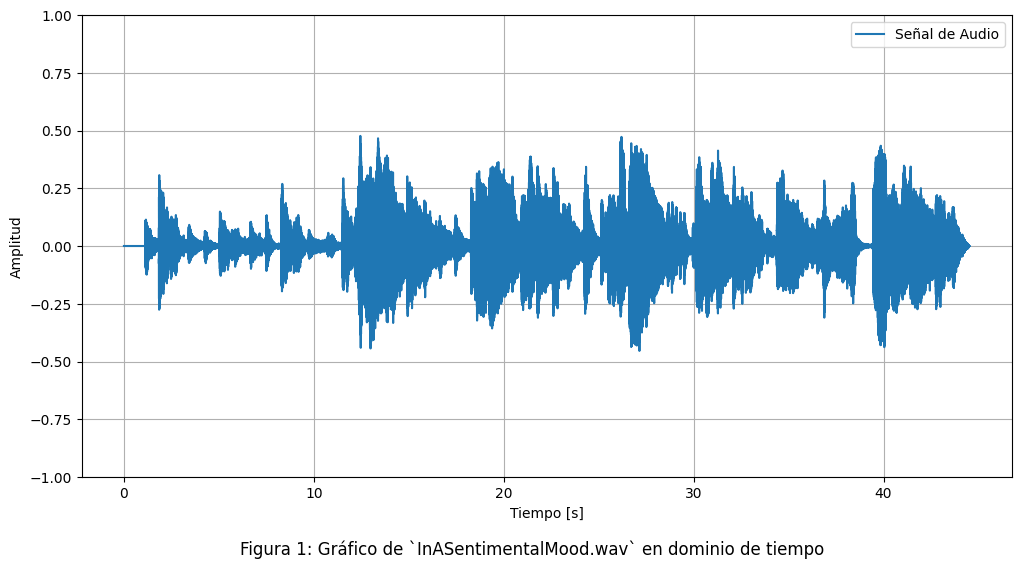

In [8]:
graph_data(file1_time, file1_data_normalized, title, 1);

Para el segundo archivo, se repite el mismo procedimiento que el realizado para el primero, solo cambia el nombre del archivo del que se obtienen los datos; en este caso siendo `Zombie.wav`.

Se obtienen los datos del archivo, se normalizan, y se construye una lista de números equidistantes que se corresponda con cada valor de la lista de datos.

In [9]:
file2_sample_rate, file2_data = wavfile.read(file2_name)
file2_time = np.arange(len(file2_data)) / file2_sample_rate
file2_data_normalized = file2_data / np.iinfo(file2_data.dtype).max

Luego de obtener y procesar los datos, se grafican utilizando la función `graph_data`:

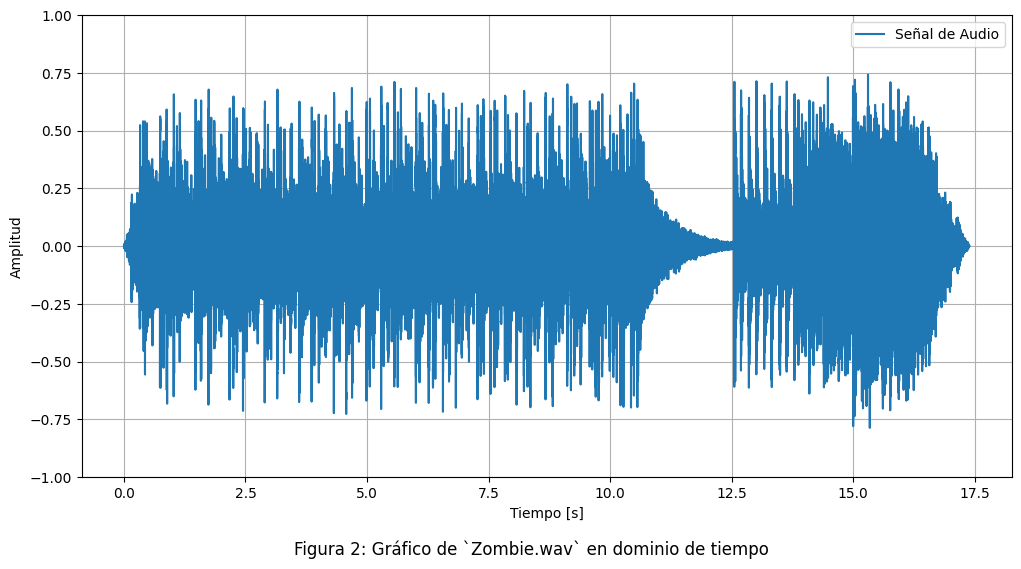

In [10]:
title = 'Gráfico de `' + str(file2_name) + '` en dominio de tiempo'
graph_data(file2_time, file2_data_normalized, title, 2);

### Identificación de Notas Musicales

Para identificar las diferentes notas musicales del primer archivo (`InASentimentalMood.wav`),
analizamos visualmente el gráfico, reduciendo la escala de tiempo a un pequeño intervalo en zonas
específicas de la figura, como se muestra en la Figura 3 a continuación, en la cual se toma
el intervalo de tiempo `[1.13, 1.30]`.

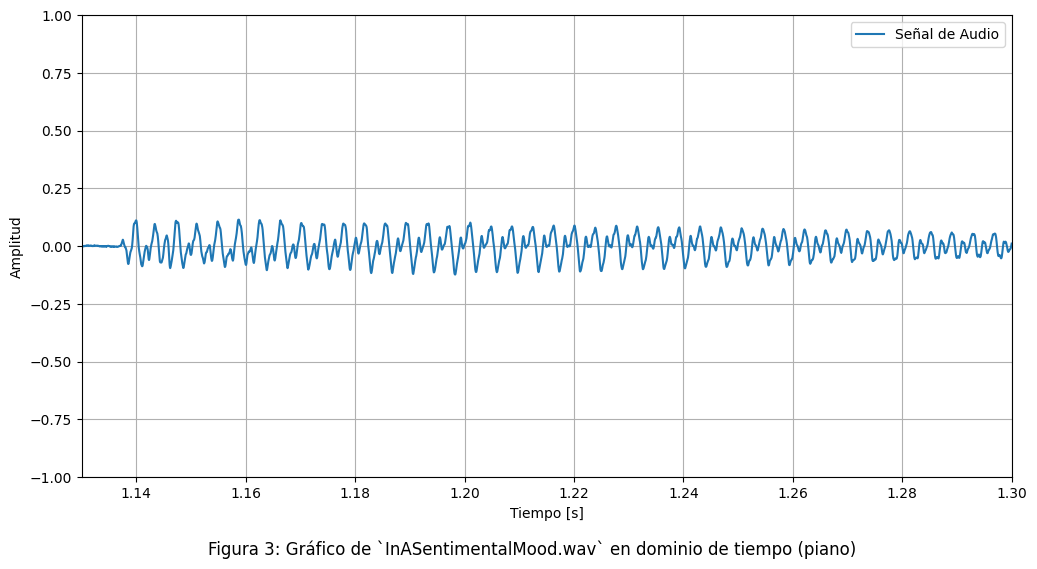

In [1]:
title = 'Gráfico de `' + str(file1_name) + '` en dominio de tiempo (piano)'
graph_data(file1_time, file1_data_normalized, title, 3, 1.13, 0.17);

Dicho intervalo de tiempo corresponde a la primera nota que puede escucharse en el archivo, producida por un piano, instrumento armónico. Si ampliamos el intervalo aún más, podremos distinguir la duración aproximada de un período (Figura 4).

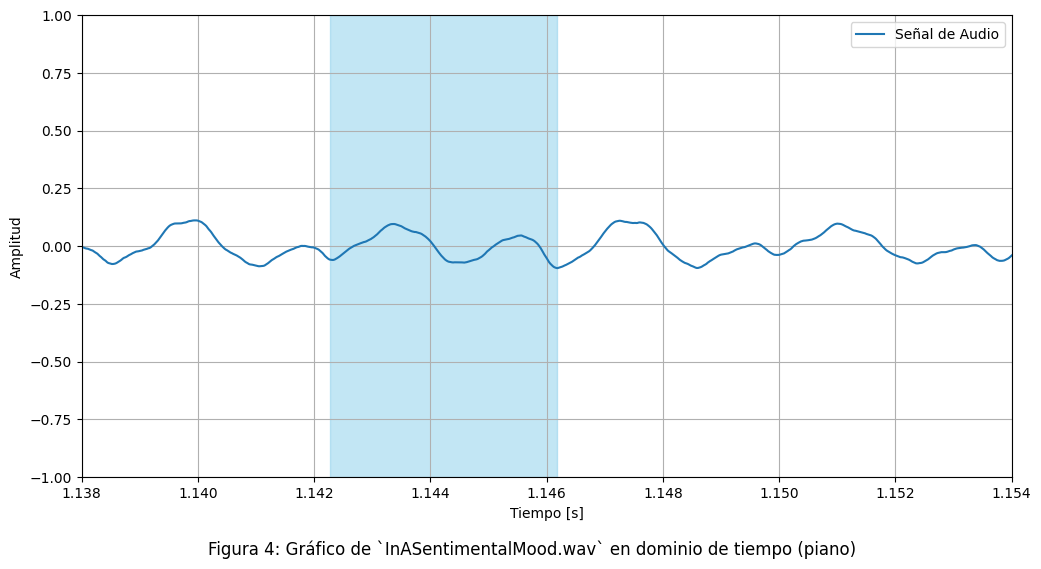

In [12]:
title = 'Gráfico de `' + str(file1_name) + '` en dominio de tiempo (piano)'
graph_data(file1_time, file1_data_normalized, title, 4, 1.138, 0.016, 1.14228, 0.0039)

Dicho periodo es de aproximadamente 3.9 milisegundos, lo cual corresponde a una frecuencia fundamental de unos 256 Hz. En música, una frecuencia de 256 Hz se acerca más a una nota `DO` de la 4° octava.

A su vez, en la Figura 5, podemos observar visualmente una nota producida por un saxofón. Como es propio de los instrumentos de viento, sus notas son más fuertes y resaltantes que las del piano, así como de mayor energía según puede evidenciarse por los picos del gráfico.

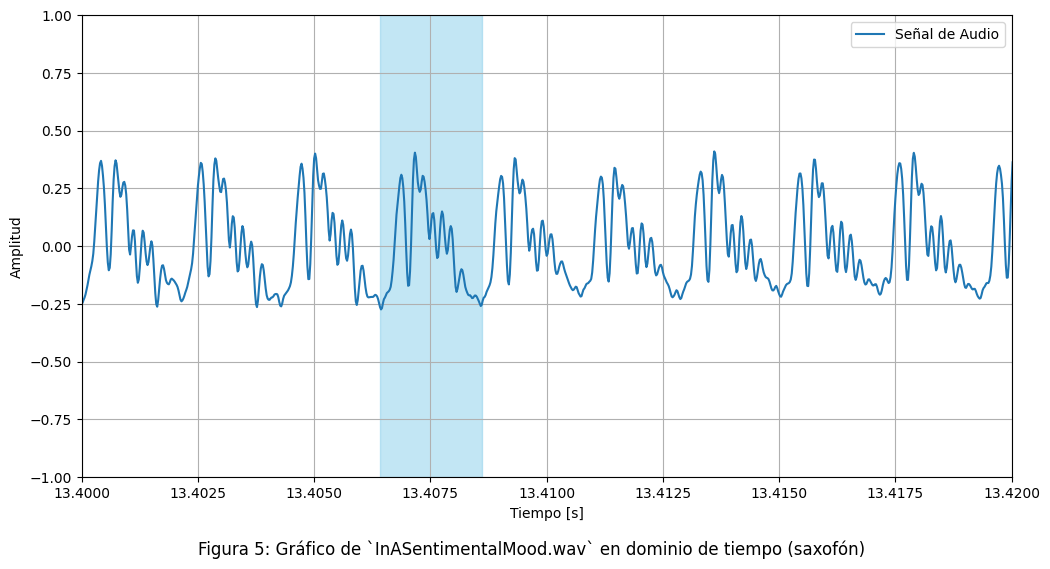

In [13]:
title = 'Gráfico de `' + str(file1_name) + '` en dominio de tiempo (saxofón)'
graph_data(file1_time, file1_data_normalized, title, 5, 13.4, 0.02, 13.40642, 0.0022);


La nota producida por este instrumento también tiene un periodo claramente distinguible, de unos 2.2 milisegundos, lo cual corresponde aproximadamente a 435 Hz y se acerca a una nota `LA` de la 4° octava (tomando como referencia el piano).

### Diferencias entre Instrumentos de Percusión y Armónicos

De manera análoga al análisis realizado para la Figura 1, se analiza la Figura 2, correspondiente
al segundo archivo, queriendo hallar diferencias notables entre los instrumentos de
percusión y los armónicos.

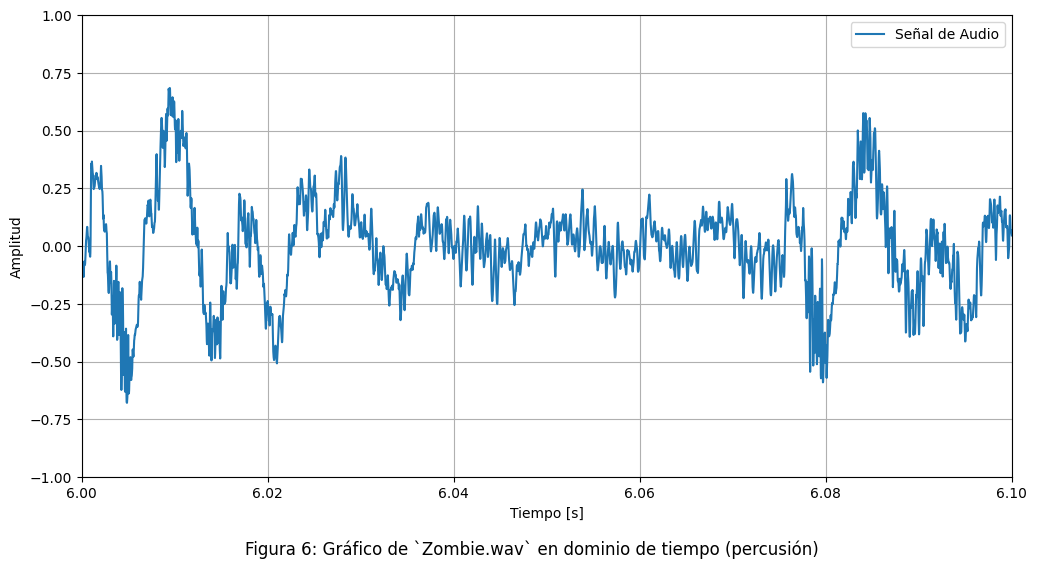

In [14]:
title = 'Gráfico de `' + str(file2_name) + '` en dominio de tiempo (percusión)'
graph_data(file2_time, file2_data_normalized, title, 6, 6.0, 0.1);

En este archivo de audio los instrumentos son enteramente de
percusión; por ello, la forma de la onda resulta más irregular y
aperiódica a la vista que las de las Figuras 4 y 5. Esto imposibilita
la distinción de una frecuencia fundamental o "notas musicales" en los
sonidos. Sin embargo, al escuchar el audio se puede notar como el rol de
estos instrumentos (batería y platillos) es el de marcar un ritmo claro
imponiendo tempos a través del contraste entre los sonidos; y por esto se
puede notar cierta repetición (a partir de cada pico por arriba de los 0.5 de amplitud) en el esquema de la onda a pesar de su
aparente falta de periodicidad.